In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

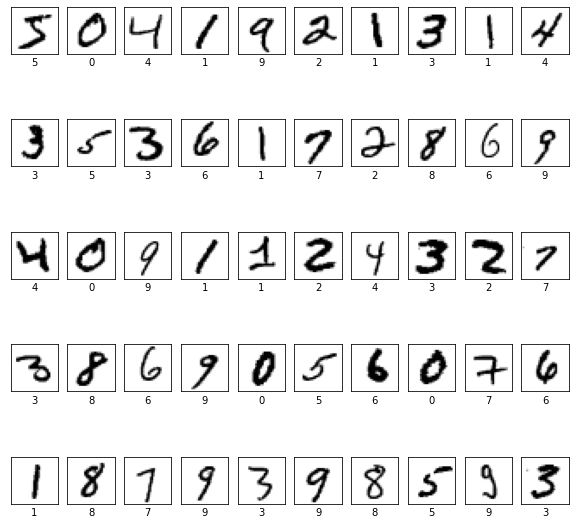

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1999 - accuracy: 0.9397
Epoch 2/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0786 - accuracy: 0.9764
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0505 - accuracy: 0.9844
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0348 - accuracy: 0.9890
Epoch 5/10
1863/1875 [============================>.] - ETA: 0s - loss: 0.0278 - accuracy: 0.9908
Reached 99% accuracy so cancelling training!
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0279 - accuracy: 0.9908
[[1.13068804e-10 1.09266585e-09 1.53747981e-09 ... 9.99994278e-01
  5.06687026e-10 2.71381424e-07]
 [7.17748387e-12 2.21593099e-09 1.00000000e+00 ... 3.19430312e-16
  1.73157189e-09 1.13948649e-14]
 [1.32286910e-08 9.99909282e-01 5.14343810e-06 ... 3.03257584e-05
  3.60530066e-05 2.31514097e-08]
 ...
 [2.75727488e-16 4.40417425e-11 8.67655182e-16 ... 8.534

In [4]:
import tensorflow as tf
import matplotlib.pyplot as plt


class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.99):
      print("\nReached 99% accuracy so cancelling training!")
      self.model.stop_training = True

mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

plt.figure(figsize=(10,10))
for i in range(50):
    plt.subplot(5,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

callbacks = myCallback()

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10, callbacks=[callbacks])

predictions = model.predict(x_test)
print(predictions)


NameError: ignored

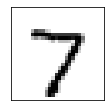

In [7]:
import numpy as np

def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                100*np.max(predictions_array),
                                true_label),
                                color=color)
  
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], y_test, x_test)
plt.tight_layout()
plt.show()
